## Standardization 


**Type of Content:** Documentation

**Domain:** Machine Learning

**Module:** Feature Engineering and Performance Metrices

### What is Standardization?

Standardization is another feature scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data, not the entire dataset.

### How to standardize data?

Z-score is one of the most popular methods to standardize data, and can be done by subtracting the mean and dividing by the standard deviation for each value of each feature.

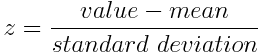

Once the standardization is done, all the features will have a mean of zero, a standard deviation of one, and thus, the same scale.

Subtracting the mean from the data is called **centering**, whereas dividing by the standard deviation is called **scaling**. As such, the method is sometime called **“center scaling“**.

Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

These differences in the ranges of initial features causes trouble to many machine learning models. For example, for the models that are based on distance computation, if one of the features has a broad range of values, the distance will be governed by this particular feature.

To illustrate this with an example : say we have a 2-dimensional data set with two features, Height in Meters and Weight in Pounds, that range respectively from [1 to 2] Meters and [10 to 200] Pounds. No matter what distance based model you perform on this data set, the Weight feature will dominate over the Height feature and will have more contribution to the distance computation, just because it has bigger values compared to the Height. So, to prevent this problem, transforming features to comparable scales using standardization is the solution.

A value is standardized as follows:

y = (x – mean) / standard_deviation

Where the mean is calculated as:

mean = sum(x) / count(x)

And the standard_deviation is calculated as:

standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

We can guesstimate a mean of 10.0 and a standard deviation of about 5.0. Using these values, we can standardize the first value of 20.7 as follows:

y = (x – mean) / standard_deviation

y = (20.7 – 10) / 5

y = (10.7) / 5

y = 2.14

The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.

You can standardize your dataset using the scikit-learn object StandardScaler.

In [74]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


We can see that the mean value in each column is assigned a value of 0.0 if present and the values are centered around 0.0 with values both positive and negative.

**Check whether the data is standardized or not**

In [79]:
scaled.mean(axis=0)

array([ 4.4408921e-17, -4.4408921e-17])

In [89]:
scaled.std(axis=0)

array([1., 1.])

[4.4408920985006264e-17, -4.4408920985006264e-17]


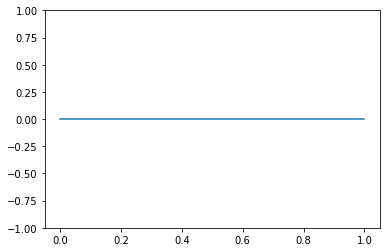

In [88]:
#mean should be 0
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.ylim(-1,1)
means=[]
for i in range(data.shape[1]):
  means.append(np.mean(scaled[:,i]))
print(means)
plt.plot(means, scaley=False)

[0.9999999999999998, 1.0]


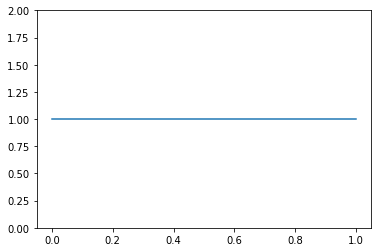

In [87]:
#Check variance which should be 1
plt.ylim(0,2)
vars=[]
for i in range(data.shape[1]):
  vars.append(np.var(scaled[:,i]))
print(vars)
plt.plot(vars)


From above output we can see that our data is standardized as mean is zero and standard deviation is one.

### When to standardize data and why?

For distance-based models, standardization is performed to prevent features with wider ranges from dominating the distance metric. But the reason we standardize data is not the same for all machine learning models and differs from one model to another.

So before which ML models and methods you have to standardize your data and why?

1. **BEFORE PCA:**
In Principal Component Analysis, features with high variances/wide ranges, get more weight than those with low variance, and consequently, they end up illegitimately dominating the First Principal Components (Components with maximum variance). I used the word “Illegitimately” here because the reason these features have high variances compared to the other ones is just that they were measured on different scales.Standardization can prevent this, by giving the same weightage to all features.

2. **BEFORE CLUSTERING:**
Clustering models are distance-based algorithms, in order to measure similarities between observations and form clusters they use a distance metric. So, features with high ranges will have a bigger influence on the clustering. Therefore, standardization is required before building a clustering model.

3. **BEFORE KNN:**
k-nearest neighbor is a distance-based classifier that classifies new observations based on similarity measures (e.g., distance metrics) with labeled observations of the training set. Standardization makes all variables contribute equally to the similarity measures.

4. **BEFORE SVM:**
Support Vector Machine tries to maximize the distance between the separating plane and the support vectors. If one feature has very large values, it will dominate over other features when calculating the distance. So Standardization gives all features the same influence on the distance metric.

5. **BEFORE MEASURING VARIABLE IMPORTANCE IN REGRESSION MODELS:**
You can measure variable importance in regression analysis, by fitting a regression model using the standardized independent variables and comparing the absolute value of their standardized coefficients. But, if the independent variables are not standardized, comparing their coefficients becomes meaningless.

6. **BEFORE LASSO AND RIDGE REGRESSION:**
LASSO and Ridge regressions place a penalty on the magnitude of the coefficients associated with each variable. And the scale of variables will affect how many penalties will be applied to their coefficients. Because coefficients of variables with large variance are small and thus less penalized. Therefore, standardization is required before fitting both regressions.

### What are the cases when we can’t apply standardization?

1. Logistic Regression 
2. Tree-based algorithms

Logistic Regression and Tree-based algorithms such as Decision Tree, Random forest, and gradient boosting, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features. So standardization is not needed before fitting this kind of models.


### Implementation on Real Dataset

It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

The example below demonstrate data standardization of the Iris flowers dataset.

In [107]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [108]:
#Loading Iris dataset from  sklearn library
Iris = datasets.load_iris()

In [109]:
#Here are all the keys
list(Iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [110]:
#Now for just data preprocessing purpose lets convert the data into Dataframe
df_I = pd.DataFrame(Iris['data'])
df_I['Species'] = pd.DataFrame(Iris['target'])
df_I.head()

,0,1,2,3,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [111]:
#I will just replace columns name with real name of columns
df_I=df_I.rename({0: 'SepalLengthCm', 1: 'SepalWidthCm', 2: 'PetalLengthCm', 3: 'PetalWidthCm'},axis=1)
df_I.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [112]:
print(df_I.shape)
print(df_I.keys())

(150, 5)
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [113]:
df_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [114]:
#Here following species represents the following numbers, 0: "Iris-setosa", 1: "Iris-versicolor", 2: 'Iris-virginica'.
df_I['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [115]:
#Splitting the dependent and independent data
X=df_I.drop(["Species"],axis=1)
Y=df_I["Species"]

In [116]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
print(X)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [118]:
X.mean(axis=0)

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [119]:
X.std(axis=0)

array([1., 1., 1., 1.])

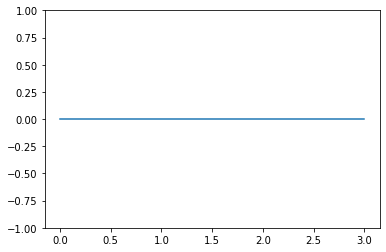

In [120]:
#check whether the data is standardized or not
#mean should be 0
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.ylim(-1,1)
means=[]
for i in range(X.shape[1]):
  means.append(np.mean(X[:,i]))
plt.plot(means, scaley=False)

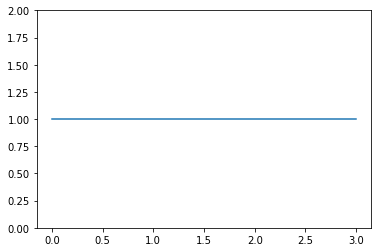

In [121]:
#Check variance which should be 1
plt.ylim(0,2)
vars=[]
for i in range(X.shape[1]):
  vars.append(np.var(X[:,i]))
plt.plot(vars)

From above output we can see that our data is standardized as you can see our mean is 0 and standard deviation is one.

### Conclusion

We came to know, when to standardize and when not to, depends on which model you want to use and what you want to do with it. So, it’s very important for a ML developer to understand the internal functioning of machine learning algorithms, to be able to know when to standardize data and to build a successful machine learning model.

**References:**

1. https://365datascience.com/
2. https://www.listendata.com/
3. https://builtin.com/data-science/when-and-why-standardize-your-data
